# Bitcoin price predictor using RNN

## Load data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(123)
import seaborn as sns
import datetime
from datetime import date
import yfinance as yf
from tensorflow.keras import models
import os

In [2]:
## DOWNLOAD DATA DIRECTLY FROM YAHOO FINANCE ##########
stocks = ['BTC-USD','^GSPC','DX-Y.NYB','^IXIC','GOOG','BTC=F','^KS11','000001.SS'] #### ADD FEATURES HERE ####
end = datetime.datetime(2020,11,25)
start = datetime.datetime(2019,11,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1d')

[*********************100%***********************]  8 of 8 completed


In [3]:
for lag in range(-14, 0):
    print(lag)

-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1


In [4]:
stock_prices

Adj Close                                                      \
              000001.SS       BTC-USD         BTC=F   DX-Y.NYB         GOOG   
Date                                                                          
2019-11-01  2958.199951   9261.104492   9235.000000  97.230003  1273.739990   
2019-11-02          NaN   9324.717773           NaN        NaN          NaN   
2019-11-03          NaN   9235.354492           NaN        NaN          NaN   
2019-11-04  2975.489990   9412.612305   9565.000000  97.510002  1291.369995   
2019-11-05  2991.560059   9342.527344   9420.000000  97.980003  1292.030029   
2019-11-06  2978.600098   9360.879883   9360.000000  97.949997  1291.800049   
2019-11-07  2978.709961   9267.561523   9220.000000  98.139999  1308.859985   
2019-11-08  2964.179932   8804.880859   8845.000000  98.349998  1311.369995   
2019-11-09          NaN   8813.582031           NaN        NaN          NaN   
2019-11-10          NaN   9055.526367           NaN        NaN          NaN   
2019-11-11  2909.969971   8757.788086   8750.000000  98.220001  1299.189941   
2019-11-12  2914.820068   8815.662109   8835.000000  98.309998  1298.800049   
2019-11-13  2905.239990   8808.262695   8785.000000  98.370003  1298.000000   
2019-11-14  2909.870117   8708.094727   8675.000000  98.160004  1311.459961   
2019-11-15  2891.340088   8491.992188   8505.000000  98.000000  1334.869995   
2019-11-16          NaN   8550.760742           NaN        NaN          NaN   
2019-11-17          NaN   8577.975586           NaN        NaN          NaN   
2019-11-18  2909.199951   8309.286133   8205.000000  97.790001  1320.699951   
2019-11-19  2933.989990   8206.145508   8110.000000  97.860001  1315.459961   
2019-11-20  2911.050049   8027.268066   8110.000000  97.930000  1303.050049   
2019-11-21  2903.639893   7642.750000   7580.000000  97.989998  1301.349976   
2019-11-22  2885.290039   7296.577637   7330.000000  98.269997  1295.339966   
2019-11-23          NaN   7397.796875           NaN        NaN          NaN   
2019-11-24          NaN   7047.916992           NaN        NaN          NaN   
2019-11-25  2906.169922   7146.133789   7165.000000  98.320000  1306.689941   
2019-11-26  2907.060059   7218.371094   7115.000000  98.250000  1313.550049   
2019-11-27  2903.189941   7531.663574   7570.000000  98.410004  1312.989990   
2019-11-28  2889.693115   7463.105957           NaN        NaN          NaN   
2019-11-29  2871.979980   7761.243652           NaN        NaN  1304.959961   
2019-11-30          NaN   7569.629883           NaN        NaN          NaN   
...                 ...           ...           ...        ...          ...   
2020-10-27  3254.315918  13654.218750  13685.000000  92.940002  1604.260010   
2020-10-28  3269.239990  13271.285156  13175.000000  93.449997  1516.619995   
2020-10-29  3272.729980  13437.882812  13505.000000  93.959999  1567.239990   
2020-10-30  3224.532959  13546.522461  13478.599609  94.040001  1621.010010   
2020-10-31          NaN  13780.995117           NaN        NaN          NaN   
2020-11-01          NaN  13737.109375           NaN        NaN          NaN   
2020-11-02  3225.120117  13550.489258  13790.000000  94.050003  1626.030029   
2020-11-03  3271.073975  13950.300781  13845.000000  93.550003  1650.209961   
2020-11-04  3277.439941  14133.707031  14200.000000  93.410004  1749.130005   
2020-11-05  3320.133057  15579.848633  15260.000000  92.529999  1763.369995   
2020-11-06  3312.158936  15565.880859  15630.000000  92.230003  1761.750000   
2020-11-07          NaN  14833.753906           NaN        NaN          NaN   
2020-11-08          NaN  15479.567383           NaN        NaN          NaN   
2020-11-09  3373.729980  15332.315430  15450.000000  92.730003  1763.000000   
2020-11-10  3360.148926  15290.902344  15355.000000  92.750000  1740.390015   
2020-11-11  3342.202881  15701.339844  15805.000000  93.040001  1752.709961   
2020-11-12  3338.679932  16276.343750  16240.000000  92.959999  

In [5]:
raw_df = stock_prices
raw_df.head(5)

Adj Close                                               \
              000001.SS      BTC-USD   BTC=F   DX-Y.NYB         GOOG   
Date                                                                   
2019-11-01  2958.199951  9261.104492  9235.0  97.230003  1273.739990   
2019-11-02          NaN  9324.717773     NaN        NaN          NaN   
2019-11-03          NaN  9235.354492     NaN        NaN          NaN   
2019-11-04  2975.489990  9412.612305  9565.0  97.510002  1291.369995   
2019-11-05  2991.560059  9342.527344  9420.0  97.980003  1292.030029   

                                                         Close               \
                  ^GSPC        ^IXIC        ^KS11    000001.SS      BTC-USD   
Date                                                                          
2019-11-01  3066.909912  8386.400391  2100.199951  2958.199951  9261.104492   
2019-11-02          NaN          NaN          NaN          NaN  9324.717773   
2019-11-03          NaN          NaN          NaN          NaN  9235.354492   
2019-11-04  3078.270020  8433.200195  2130.239990  2975.489990  9412.612305   
2019-11-05  3074.620117  8434.679688  2142.639893  2991.560059  9342.527344   

            ...         Open                 Volume                       \
            ...        ^IXIC        ^KS11 000001.SS      BTC-USD   BTC=F   
Date        ...                                                            
2019-11-01  ...  8335.049805  2084.790039  159900.0  24324691031  2641.0   
2019-11-02  ...          NaN          NaN       NaN  21242676385     NaN   
2019-11-03  ...          NaN          NaN       NaN  21132220847     NaN   
2019-11-04  ...  8445.500000  2111.320068  167200.0  26170255634  3453.0   
2019-11-05  ...  8446.620117  2133.659912  179900.0  26198609047  2875.0   

                                                                      
           DX-Y.NYB       GOOG         ^GSPC         ^IXIC     ^KS11  
Date                                                                  
2019-11-01      0.0  1670100.0  3.930200e+09  2.057310e+09  418300.0  
2019-11-02      NaN        NaN           NaN           NaN       NaN  
2019-11-03      NaN        NaN           NaN           NaN       NaN  
2019-11-04      0.0  1501000.0  4.146850e+09  2.149910e+09  476300.0  
2019-11-05      0.0  1282700.0  4.486130e+09  2.316710e+09  400600.0  

[5 rows x 48 columns]

In [6]:
raw_df['Date'] =  raw_df.index

In [7]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

## Check features correlation with BITCOIN 

In [8]:
stock_prices['Close'].corr()

,000001.SS,BTC-USD,BTC=F,DX-Y.NYB,GOOG,^GSPC,^IXIC,^KS11
000001.SS,1.000000,0.718739,0.718705,-0.902377,0.804650,0.773152,0.890124,0.826233
BTC-USD,0.718739,1.000000,0.998735,-0.756620,0.877534,0.731458,0.846667,0.780789
BTC=F,0.718705,0.998735,1.000000,-0.756309,0.876947,0.733770,0.845607,0.781181
DX-Y.NYB,-0.902377,-0.756620,-0.756309,1.000000,-0.779722,-0.784809,-0.883873,-0.858868
GOOG,0.804650,0.877534,0.876947,-0.779722,1.000000,0.896698,0.928098,0.881032
^GSPC,0.773152,0.731458,0.733770,-0.784809,0.896698,1.000000,0.858055,0.963286
^IXIC,0.890124,0.846667,0.845607,-0.883873,0.928098,0.858055,1.000000,0.881548
^KS11,0.826233,0.780789,0.781181,-0.858868,0.881032,0.963286,0.881548,1.000000


<AxesSubplot:>

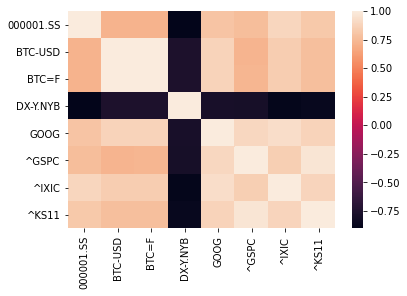

In [9]:
sns.heatmap(stock_prices['Close'].corr())

## Exploratory analysis

## formatting data - from yahoo finance

In [10]:
def get_data(indices,keys):
    a =[(key,index) for key in keys for index in indices]
    return raw_df[a] 

In [11]:
####### INCLUDE NEW FEATURES HERE ####### 
df = get_data(['BTC-USD','^GSPC','DX-Y.NYB','^IXIC','GOOG','BTC=F','^KS11','000001.SS'],['Close','High','Low','Volume'])  

In [12]:
df.head(5)

Close                                                    \
                BTC-USD        ^GSPC   DX-Y.NYB        ^IXIC         GOOG   
Date                                                                        
2019-11-01  9261.104492  3066.909912  97.230003  8386.400391  1273.739990   
2019-11-02  9324.717773          NaN        NaN          NaN          NaN   
2019-11-03  9235.354492          NaN        NaN          NaN          NaN   
2019-11-04  9412.612305  3078.270020  97.510002  8433.200195  1291.369995   
2019-11-05  9342.527344  3074.620117  97.980003  8434.679688  1292.030029   

                                                     High               ...  \
             BTC=F        ^KS11    000001.SS      BTC-USD        ^GSPC  ...   
Date                                                                    ...   
2019-11-01  9235.0  2100.199951  2958.199951  9275.657227  3066.949951  ...   
2019-11-02     NaN          NaN          NaN  9377.486328          NaN  ...   
2019-11-03     NaN          NaN          NaN  9379.806641          NaN  ...   
2019-11-04  9565.0  2130.239990  2975.489990  9505.051758  3085.199951  ...   
2019-11-05  9420.0  2142.639893  2991.560059  9457.417969  3083.949951  ...   

                    Low                    Volume                         \
                  ^KS11    000001.SS      BTC-USD         ^GSPC DX-Y.NYB   
Date                                                                       
2019-11-01  2081.530029  2917.149902  24324691031  3.930200e+09      0.0   
2019-11-02          NaN          NaN  21242676385           NaN      NaN   
2019-11-03          NaN          NaN  21132220847           NaN      NaN   
2019-11-04  2111.320068  2964.580078  26170255634  4.146850e+09      0.0   
2019-11-05  2128.699951  2968.030029  26198609047  4.486130e+09      0.0   

                                                                 
                   ^IXIC       GOOG   BTC=F     ^KS11 000001.SS  
Date                                                             
2019-11-01  2.057310e+09  1670100.0  2641.0  418300.0  159900.0  
2019-11-02           NaN        NaN     NaN       NaN       NaN  
2019-11-03           NaN        NaN     NaN       NaN       NaN  
2019-11-04  2.149910e+09  1501000.0  3453.0  476300.0  167200.0  
2019-11-05  2.316710e+09  1282700.0  2875.0  400600.0  179900.0  

[5 rows x 32 columns]

## Data preprossesing

### getting rid of NaNs

In [13]:
df = df.fillna(method='ffill')

### calculating percentage change of btc_price

In [14]:
df['percentage_change_price'] = df['Close']['BTC-USD'].pct_change()

In [15]:
df.head(2)

Close                                                   \
                BTC-USD        ^GSPC   DX-Y.NYB        ^IXIC        GOOG   
Date                                                                       
2019-11-01  9261.104492  3066.909912  97.230003  8386.400391  1273.73999   
2019-11-02  9324.717773  3066.909912  97.230003  8386.400391  1273.73999   

                                                     High               ...  \
             BTC=F        ^KS11    000001.SS      BTC-USD        ^GSPC  ...   
Date                                                                    ...   
2019-11-01  9235.0  2100.199951  2958.199951  9275.657227  3066.949951  ...   
2019-11-02  9235.0  2100.199951  2958.199951  9377.486328  3066.949951  ...   

                    Low       Volume                                       \
              000001.SS      BTC-USD         ^GSPC DX-Y.NYB         ^IXIC   
Date                                                                        
2019-11-01  2917.149902  24324691031  3.930200e+09      0.0  2.057310e+09   
2019-11-02  2917.149902  21242676385  3.930200e+09      0.0  2.057310e+09   

                                                  percentage_change_price  
                 GOOG   BTC=F     ^KS11 000001.SS                          
Date                                                                       
2019-11-01  1670100.0  2641.0  418300.0  159900.0                     NaN  
2019-11-02  1670100.0  2641.0  418300.0  159900.0                0.006869  

[2 rows x 33 columns]

In [16]:
####### CHECK UNBALANCED DATA SET ########
(df['percentage_change_price']>0).value_counts()

True     208
False    183
Name: percentage_change_price, dtype: int64

## Transform Date

In [17]:
df.columns

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Date', 'percentage_change_price'], ['000001.SS', 'BTC-USD', 'BTC=F', 'DX-Y.NYB', 'GOOG', '^GSPC', '^IXIC', '^KS11', '']],
           codes=[[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 7], [1, 5, 3, 6, 4, 2, 7, 0, 1, 5, 3, 6, 4, 2, 7, 0, 1, 5, 3, 6, 4, 2, 7, 0, 1, 5, 3, 6, 4, 2, 7, 0, 8]])

In [18]:
new_colum_names = []
for el1, el2 in df.columns:
    new_colum_names.append(el1 + "_" + el2)
new_colum_names

['Close_BTC-USD',
 'Close_^GSPC',
 'Close_DX-Y.NYB',
 'Close_^IXIC',
 'Close_GOOG',
 'Close_BTC=F',
 'Close_^KS11',
 'Close_000001.SS',
 'High_BTC-USD',
 'High_^GSPC',
 'High_DX-Y.NYB',
 'High_^IXIC',
 'High_GOOG',
 'High_BTC=F',
 'High_^KS11',
 'High_000001.SS',
 'Low_BTC-USD',
 'Low_^GSPC',
 'Low_DX-Y.NYB',
 'Low_^IXIC',
 'Low_GOOG',
 'Low_BTC=F',
 'Low_^KS11',
 'Low_000001.SS',
 'Volume_BTC-USD',
 'Volume_^GSPC',
 'Volume_DX-Y.NYB',
 'Volume_^IXIC',
 'Volume_GOOG',
 'Volume_BTC=F',
 'Volume_^KS11',
 'Volume_000001.SS',
 'percentage_change_price_']

In [19]:
df.columns = new_colum_names

In [20]:
df['Date'] = df.index

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

df['year'] = df['Date'].dt.year

In [22]:
# Define percentage change in price column
df['delta_binary'] = df.percentage_change_price_>0
df['delta_binary'] = df['delta_binary'].astype(int)
df.head(2)

,Close_BTC-USD,Close_^GSPC,Close_DX-Y.NYB,Close_^IXIC,Close_GOOG,Close_BTC=F,Close_^KS11,Close_000001.SS,High_BTC-USD,High_^GSPC,...,Volume_^IXIC,Volume_GOOG,Volume_BTC=F,Volume_^KS11,Volume_000001.SS,percentage_change_price_,Date,month,year,delta_binary
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,9261.104492,3066.909912,97.230003,8386.400391,1273.73999,9235.0,2100.199951,2958.199951,9275.657227,3066.949951,...,2.057310e+09,1670100.0,2641.0,418300.0,159900.0,NaN,2019-11-01,11,2019,0
2019-11-02,9324.717773,3066.909912,97.230003,8386.400391,1273.73999,9235.0,2100.199951,2958.199951,9377.486328,3066.949951,...,2.057310e+09,1670100.0,2641.0,418300.0,159900.0,0.006869,2019-11-02,11,2019,1


In [23]:
df[['percentage_change_price_','delta_binary']].head(2)

,percentage_change_price_,delta_binary
Date,,
2019-11-01,NaN,0
2019-11-02,0.006869,1


In [24]:
scaled_names = df.columns[:-1]
scaled_names

Index(['Close_BTC-USD', 'Close_^GSPC', 'Close_DX-Y.NYB', 'Close_^IXIC',
       'Close_GOOG', 'Close_BTC=F', 'Close_^KS11', 'Close_000001.SS',
       'High_BTC-USD', 'High_^GSPC', 'High_DX-Y.NYB', 'High_^IXIC',
       'High_GOOG', 'High_BTC=F', 'High_^KS11', 'High_000001.SS',
       'Low_BTC-USD', 'Low_^GSPC', 'Low_DX-Y.NYB', 'Low_^IXIC', 'Low_GOOG',
       'Low_BTC=F', 'Low_^KS11', 'Low_000001.SS', 'Volume_BTC-USD',
       'Volume_^GSPC', 'Volume_DX-Y.NYB', 'Volume_^IXIC', 'Volume_GOOG',
       'Volume_BTC=F', 'Volume_^KS11', 'Volume_000001.SS',
       'percentage_change_price_', 'Date', 'month', 'year'],
      dtype='object')

## Data Sampling

- Out of this very long time-series, we will subsample it into shorter samples, each corresponding to one sequence of data  𝑋𝑖  with its corresponding prediction  𝑦𝑖 .
- get_sample -> function to get this random sample

Note:
  
  - **length** corresponds to the lenght of the observed sequence
  - **temporal_horizon** corresponds to the number of days between your last seen stock market value and the day you are trying to predict. -> in our case we want to predict for now the day after so tempor_horizon =1

In [25]:

def get_sample(df, length, temporal_horizon, random_start):
    features = [col_name for col_name in df.columns if col_name not in {'Date', 'Close_BTC-USD','delta_binary',
                                                                        'percentage_change_price_'} ]
    
    temporal_horizon = temporal_horizon - 1
    last_possible = df.shape[0] - temporal_horizon - length

    X_sample = df[features].iloc[random_start: random_start+length].values ## we need to say which features we are using??!
    y_sample = df['delta_binary'].iloc[random_start+length+temporal_horizon]
    y_before = df['delta_binary'].iloc[random_start+length+temporal_horizon-1]
   
    return X_sample, y_sample, y_before

get_sample(df,1,1)

For instance, get_sample(df, 10, 3) returns a first list of **10 stock market values**, and a second value which is the stock market value 3 days after the last seen value.

## Dataset construction

The previous function creates a sample (𝑋𝑖,𝑦𝑖) . If we repeat this operation, we will get multiple samples, that once concatenated will correspond to our entire dataset (𝑋,𝑦) .

Create a function get_X_y(data, temporal_horizon, length_of_sequences) that create this dataset.

- data corresponds to your input data
- temporal_horizon is the number of days between the last seen value and the predicted one
- length_of_sequences is a list that corresponds to the length of each sample 𝑋𝑖 : [len(X_1), len(X_2), len(X_3), ..., ] as that each sequence 𝑋𝑖 has no reason to be of the same length as the other one.

Hint: This function should use get_sample

In [26]:
# create a matrix
def get_X_y(df, temporal_horizon, length_of_sequences, start_of_sequences):
    X, y, y_before = [], [], []
    
    #import ipdb;ipdb.set_trace()

    for start in start_of_sequences:
        xi, yi, y_bi = get_sample(df, length_of_sequences, temporal_horizon, start)
        X.append(xi)
        y.append(yi)
        y_before.append(y_bi)
        
    return X, np.array(y), np.array(y_before)

 - Write a function given a dataframe, a temporal horizon and a list of sequence length outputs the padded train and test set.
 - To have a batch_size larger than one, we need to **pad** our data_ purely engineering reason
 

In [27]:
from sklearn.model_selection import train_test_split

def generate_data(df_train, df_test, temporal_horizon, length_of_sequences):
    
    np.random.seed(0)
    # Train 
    last_possible = df_train.shape[0] - temporal_horizon - length_of_sequences
    random_start = np.random.randint(0, last_possible)
    
    start_of_sequences_train = np.random.randint(0, last_possible, df_train.shape[0])
    
    X_train, y_train, y_b_train = get_X_y(df_train, temporal_horizon, length_of_sequences, start_of_sequences_train)
    X_train = pad_sequences(X_train, padding='post', dtype='float32')
    
    if df_test is None:
        return X_train, y_train, y_b_train

   
    # Test

    last_possible = df_test.shape[0] - temporal_horizon - length_of_sequences
    random_start = np.random.randint(0, last_possible)
    
    start_of_sequences_test = np.random.randint(0, last_possible, df_test.shape[0])
    
    X_test, y_test, y_b_test = get_X_y(df_test, temporal_horizon, length_of_sequences, start_of_sequences_test)
    X_test = pad_sequences(X_test, padding='post', dtype='float32')
        
    return X_train, X_test, y_train, y_test, y_b_test, y_b_train
    


In [28]:
#generate_data(df_train, df_test, 1, 10)[0]

In [29]:
#old - generate_data(df_train, df_test, temporal_horizon, min_len, max_len)[0].shape

- Generate data with a temporal horizon of 1 days, and 100 time-series of 10 to 10 seen days .

## Split data

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Splitting 80/20
start = 1 # do a for loop
index = round((len(df)-start)*.8)

# Past
df_train = df.iloc[start:index+start]

#Future
df_test = df.iloc[start+index:]


temporal_horizon = 1 # -> predict the day after
#min_len = 7
#max_len = 8

length_of_sequences = 7

#(group 10 days,group of 20 days , # observations each time)


In [31]:
#df.head(2)

In [32]:
df_test = df_test.drop(columns = 'Date')
df = df.drop(columns = ['Date'])

In [33]:
df_train = df_train.drop(columns = 'Date')

df_test.dtypes

## Feature scaling

##### Fetaure scaling: only on train data ######

In [34]:
df_test.shape,df_train.shape

((78, 36), (312, 36))

In [35]:
# Scaling: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#features_list = [col_name for col_name in df.columns if col_name not in {'Date', 'Close'} ]

# normalizing features
normalizer_features = MinMaxScaler()
normalizer_features.fit(df_train)
scaled_df = pd.DataFrame(normalizer_features.transform(df))

# mormalizing output/target
#normalizer_output = MinMaxScaler()
#normalizer_output.fit(df_train[['percentage_change_price']])
#scaled_df['percentage_change_price'] = normalizer_output.transform(df[['percentage_change_price']])
scaled_df['delta_binary'] = df.reset_index()[['delta_binary']]

# not normalizing, uncomment this
# scaled_df = df

## Generate data sequences

In [36]:
scaled_df_train, scaled_df_test = scaled_df.iloc[start:(index+start)], scaled_df.iloc[start+index:]

In [37]:
X_train, X_test, y_train, y_test, y_b_test, y_b_train = generate_data(scaled_df_train,
                                                    scaled_df_test, temporal_horizon, length_of_sequences)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_b_train.shape)
print(y_b_test.shape)

(312, 7, 36)
(78, 7, 36)
(312,)
(78,)
(312,)
(78,)


## Baseline model: LSTM with feature scaling 

- LSTM: Introduced to prevent the vanishing gradient: for **long** time-series, the gradient (of the backpropagation, during the optimizer updates) vanished to 0.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def init_model():

    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(7, activation='tanh'))
    model.add(layers.Dropout(0.1))
    #model.add(layers.Dense(10, activation='relu'))
    #model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])# find loss an penalizing negative or positive results - alternatives to mae
                                  # mae weighted
    return model


In [40]:
X_train.shape[0]-2

310

In [41]:
X_test.shape

(78, 7, 36)

In [42]:
# Fit the model
batch_size = X_train.shape[0]-2

from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(patience=50, mode='min', verbose=1, monitor='val_loss',restore_best_weights=True)
# patience = 30 - > if my algorithm doesnt improve my performance for a certain number of iterations 
# (patience) stop the fitting process, return the weights as they are


####n Make s
history = model.fit(X_train,y_train,
          batch_size=batch_size, 
          epochs=10000, # iteration through your data
          validation_split=0.2,
          callbacks=[es],
          verbose=1)

Epoch 1/10000
1/1 [==============================] - 1s 849ms/step - loss: 0.7256 - accuracy: 0.5060 - val_loss: 0.7041 - val_accuracy: 0.5079
Epoch 2/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.7145 - accuracy: 0.4859 - val_loss: 0.7071 - val_accuracy: 0.5397
Epoch 3/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.7124 - accuracy: 0.4458 - val_loss: 0.7094 - val_accuracy: 0.4921
Epoch 4/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.7012 - accuracy: 0.4940 - val_loss: 0.7110 - val_accuracy: 0.4921
Epoch 5/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.7053 - accuracy: 0.4819 - val_loss: 0.7116 - val_accuracy: 0.4444
Epoch 6/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.7022 - accuracy: 0.4498 - val_loss: 0.7125 - val_accuracy: 0.4603
Epoch 7/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.6938 - accuracy: 0.4618 - val_loss: 0.7137 - val_accuracy: 0.5238
Epoch

1/1 [==============================] - 0s 18ms/step - loss: 0.6747 - accuracy: 0.5823 - val_loss: 0.7071 - val_accuracy: 0.4921
Epoch 59/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.6798 - accuracy: 0.5823 - val_loss: 0.7040 - val_accuracy: 0.5079
Epoch 60/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.6755 - accuracy: 0.5823 - val_loss: 0.7049 - val_accuracy: 0.5079
Epoch 61/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.6707 - accuracy: 0.6145 - val_loss: 0.7092 - val_accuracy: 0.4762
Epoch 62/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.6738 - accuracy: 0.5863 - val_loss: 0.7083 - val_accuracy: 0.4921
Epoch 63/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.6785 - accuracy: 0.5663 - val_loss: 0.7102 - val_accuracy: 0.4444
Epoch 64/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.6719 - accuracy: 0.5904 - val_loss: 0.7057 - val_accuracy: 0.4921
Epoch 65/10000

#history.history

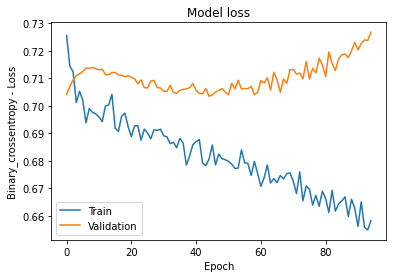

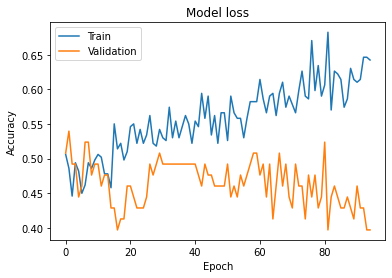

In [43]:

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Binary_crossentropy - Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model loss')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
plot_loss(history)

In [44]:
y_pred = model.predict(X_test)
res = model.evaluate(X_test,y_test)
print(f'Loss on the test set : {res[0]:.8f}')
print(f'Accuracy on the test set : {res[1]:.8f}')

3/3 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6282
Loss on the test set : 0.67025197
Accuracy on the test set : 0.62820512


In [45]:
#y_pred

In [46]:
from sklearn.metrics import confusion_matrix
y_pred_binary = y_pred >= 0.5 
# y_pred_binary

In [47]:
import sklearn
print(sklearn.__version__)

0.23.2


confusion = confusion_matrix(y_test, y_pred_binary, normalizer_features)
truth = confusion.sum(axis=1)                             

print(confusion)
print(truth)

In [48]:
#from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier,y_pred_binary , y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
print(disp)

sns.heatmap(confusion./truth.T)
print(confusion/truth)

## TAs testing stuff

In [49]:
bin_y_pred = y_pred >  0.5

In [50]:
y_pred.reshape(-1).shape

(78,)

In [51]:
y_test.shape

(78,)

In [52]:
res_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred.reshape(-1)})

In [53]:
res_df.head()

,y_true,y_pred
0,1,0.551312
1,1,0.542924
2,1,0.530904
3,1,0.545768
4,1,0.556225


In [54]:
res_df['y_pred_bin'] = res_df['y_pred'] > 0.5

In [55]:
res_df.head()

,y_true,y_pred,y_pred_bin
0,1,0.551312,True
1,1,0.542924,True
2,1,0.530904,True
3,1,0.545768,True
4,1,0.556225,True


In [56]:
res_df['correct'] = res_df['y_pred_bin'] == res_df['y_true'] 

In [57]:
res_df.head()

,y_true,y_pred,y_pred_bin,correct
0,1,0.551312,True,True
1,1,0.542924,True,True
2,1,0.530904,True,True
3,1,0.545768,True,True
4,1,0.556225,True,True


In [58]:
res_df['correct'].sum() / len(res_df)

0.6282051282051282

<AxesSubplot:xlabel='y_pred_bin'>

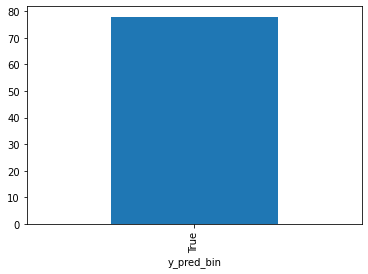

In [59]:
res_df.groupby('y_pred_bin')['y_pred_bin'].count().plot.bar()

<AxesSubplot:xlabel='y_true'>

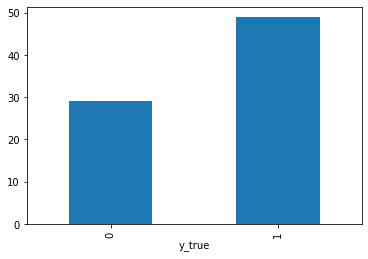

In [60]:
res_df.groupby('y_true')['y_true'].count().plot.bar()

In [61]:
X_test.shape

(78, 7, 36)

In [62]:
#X_test[0,:,:] == X_test[1,:,:]

In [63]:
#X_test[1,:,:]

## Indication buy or sell ? 

In [64]:
X_test.shape

(78, 7, 36)

In [65]:
today_test_data = scaled_df.iloc[-7:,:-1].values.reshape(1,7,36)

In [66]:
if model.predict(today_test_data)[0,0] > 0.5:
    print('time to buy')
else:
    print('time to sell')

time to buy


## graphing and comparison to coin toss

In [67]:
#df.iloc[(-1+day-length_of_sequences):-1+day,:-1]

In [68]:
#path_to_model = os.path.join(os.path.dirname(__file__), "data", "model")
loaded_model = models.load_model('data/model')

In [69]:
max_backtest = 30
#length_of_sequences = 7 
pred_list = []

for day in range(-max_backtest,0,1):
    backtest_data = df.iloc[(-1+day-length_of_sequences):-1+day,:].values.reshape(1,length_of_sequences,36)
    prediction = loaded_model.predict(backtest_data)
    print(prediction)
    if prediction > 0.5:
        pred_list.append(True)
    else:
        pred_list.append(False)
        
print(pred_list) 

[[0.9015523]]
[[0.9015484]]
[[0.9015478]]
[[0.9015478]]
[[0.9127607]]
[[0.9033183]]
[[0.9017929]]
[[0.90158105]]
[[0.9015523]]
[[0.9015484]]
[[0.9015478]]
[[0.9015478]]
[[0.9015478]]
[[0.9015478]]
[[0.90154505]]
[[0.90139544]]
[[0.8939527]]
[[0.8939527]]
[[0.8939527]]
[[0.8939527]]
[[0.8939527]]
[[0.8939527]]
[[0.90139544]]
[[0.90154505]]
[[0.90154505]]
[[0.90139544]]
[[0.8939527]]
[[0.61086136]]
[[0.8939527]]
[[0.8939527]]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [70]:
pred_list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [71]:

investment_list =  df.iloc[-max_backtest:]['percentage_change_price_'][pred_list]


In [72]:
'''
investment = 100
length = (len(investment_list)-1)
test_list = []
for i in range(0,length,1):
    investment = investment * (1+investment_list[i])
    test_list.append(investment)
'''

'\ninvestment = 100\nlength = (len(investment_list)-1)\ntest_list = []\nfor i in range(0,length,1):\n    investment = investment * (1+investment_list[i])\n    test_list.append(investment)\n'

In [73]:
graph_dates =  df.iloc[-max_backtest:].copy()
graph_dates = graph_dates[['percentage_change_price_']]
graph_dates['pred_model']=pred_list
graph_dates

,percentage_change_price_,pred_model
Date,,
2020-10-27,0.044280,True
2020-10-28,-0.028045,True
2020-10-29,0.012553,True
2020-10-30,0.008085,True
2020-10-31,0.017309,True
2020-11-01,-0.003185,True
2020-11-02,-0.013585,True
2020-11-03,0.029505,True
2020-11-04,0.013147,True


In [74]:
investment_list = []
investment = 100
for i,row in graph_dates.iterrows(): 
    if row['pred_model']:
        investment = investment * (1+row['percentage_change_price_'])
    investment_list.append(investment)

graph_dates['investment_model'] = investment_list

In [75]:
random_list = np.random.randint(2, size=max_backtest)

In [76]:
comp_list = []
for i in random_list:
    if i == 1:
        comp_list.append(True)
    else:
        comp_list.append(False)


In [77]:
graph_dates['pred_coin'] = comp_list
graph_dates

,percentage_change_price_,pred_model,investment_model,pred_coin
Date,,,,
2020-10-27,0.044280,True,104.427990,True
2020-10-28,-0.028045,True,101.499299,True
2020-10-29,0.012553,True,102.773445,True
2020-10-30,0.008085,True,103.604325,False
2020-10-31,0.017309,True,105.397581,True
2020-11-01,-0.003185,True,105.061941,False
2020-11-02,-0.013585,True,103.634663,False
2020-11-03,0.029505,True,106.692437,True
2020-11-04,0.013147,True,108.095135,True


In [78]:
coin_investment_list= []
investment_coin = 100
for i,row in graph_dates.iterrows(): 
    if row['pred_coin']:
        investment_coin = investment_coin * (1+row['percentage_change_price_'])
    coin_investment_list.append(investment_coin)

graph_dates['investment_coin'] = coin_investment_list

In [79]:
comparison_investment_list =  df.iloc[-max_backtest:]['percentage_change_price_'][comp_list]

In [80]:
'''
comp_investment = 100
length2 = (len(comparison_investment_list)-1)
for i in range(0,length2,1):
    comp_investment = comp_investment * (1+comparison_investment_list[i])
'''   

'\ncomp_investment = 100\nlength2 = (len(comparison_investment_list)-1)\nfor i in range(0,length2,1):\n    comp_investment = comp_investment * (1+comparison_investment_list[i])\n'

<function matplotlib.pyplot.show(close=None, block=None)>

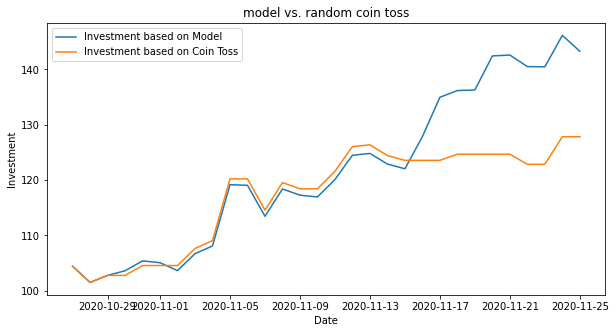

In [81]:
plt.figure(figsize=(10,5))
y1 = graph_dates['investment_model']
x1 = graph_dates.index
plt.plot(x1, y1, label = "Investment based on Model")
y2 = graph_dates['investment_coin']
x2 = graph_dates.index
plt.plot(x2, y2, label = "Investment based on Coin Toss")
plt.ylabel('Investment')
plt.xlabel('Date')
plt.title('model vs. random coin toss')
plt.legend(loc="best")
plt.show

In [82]:
graph_dates.head(10)

,percentage_change_price_,pred_model,investment_model,pred_coin,investment_coin
Date,,,,,
2020-10-27,0.044280,True,104.427990,True,104.427990
2020-10-28,-0.028045,True,101.499299,True,101.499299
2020-10-29,0.012553,True,102.773445,True,102.773445
2020-10-30,0.008085,True,103.604325,False,102.773445
2020-10-31,0.017309,True,105.397581,True,104.552319
2020-11-01,-0.003185,True,105.061941,False,104.552319
2020-11-02,-0.013585,True,103.634663,False,104.552319
2020-11-03,0.029505,True,106.692437,True,107.637169
2020-11-04,0.013147,True,108.095135,True,109.052287


## Confusion Matrix

In [83]:
y_pred = loaded_model(X_test, y_test)

In [84]:
y_pred

<tf.Tensor: shape=(78, 1), dtype=float32, numpy=
array([[0.11535013],
       [0.10618806],
       [0.07925883],
       [0.5271512 ],
       [0.88849545],
       [0.17062458],
       [0.8498305 ],
       [0.5271512 ],
       [0.4380986 ],
       [0.4562193 ],
       [0.8498305 ],
       [0.7321091 ],
       [0.11359838],
       [0.4904503 ],
       [0.56835467],
       [0.31526887],
       [0.7260735 ],
       [0.6861094 ],
       [0.5263699 ],
       [0.10618806],
       [0.8043057 ],
       [0.12351093],
       [0.70315695],
       [0.59305435],
       [0.11178586],
       [0.7260735 ],
       [0.76542085],
       [0.43312883],
       [0.7188428 ],
       [0.3178243 ],
       [0.15113282],
       [0.4380986 ],
       [0.31694695],
       [0.12351093],
       [0.62623304],
       [0.38119602],
       [0.5930544 ],
       [0.6113137 ],
       [0.24876618],
       [0.1234642 ],
       [0.59305435],
       [0.38119602],
       [0.34056586],
       [0.8654767 ],
       [0.68023837],
      

In [85]:
from sklearn.metrics import confusion_matrix
y_pred_binary = y_pred >= 0.5 
y_pred_binary

<tf.Tensor: shape=(78, 1), dtype=bool, numpy=
array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [Fa

In [86]:
y_test_reshape = y_test.reshape(-1,1)
y_test_reshape.shape

(78, 1)

In [87]:
y_pred_binary.shape

TensorShape([78, 1])

In [88]:
import sklearn
print(sklearn.__version__)

0.23.2


In [89]:
from sklearn.metrics import plot_confusion_matrix
confusion = confusion_matrix(y_test_reshape, y_pred_binary, normalize='all')

Accuracy xx 


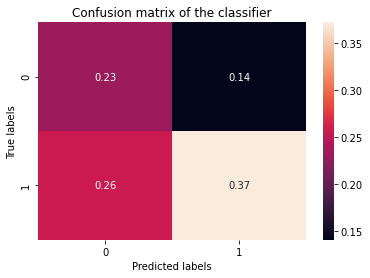

In [90]:
import seaborn  as sns
sns.heatmap (confusion, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
print('Accuracy xx ')

# Backtest